In [1]:
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import seaborn as sns

# Importation des images

## Création d'une fonction pour loader les images

In [2]:
import os
import numpy as np

# defining global variable path
image_path = "./images_training_rev1/new_images/"

#function to load folder into arrays and then it returns that same array'''
def loadImages(path):
    # Put files into lists and return them as one list of size 4
    image_files = sorted([os.path.join(path, file)
         for file in os.listdir(path) if file.endswith('.jpg')])
 
    return image_files

In [3]:
data_img = loadImages(image_path)

In [4]:
img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data_img]
print(img[0].shape)

(64, 64, 3)


In [5]:
img = np.asarray(img)

## Récupération des outputs correspondants aux images chargées

In [6]:
data = pd.read_csv('class1_df.csv', index_col=0)

## Aperçu des classes de galaxies

In [7]:
data.sum()

Class1.1    26634.078867
Class1.2    33391.365339
Class1.3     1552.555731
dtype: float64

# Séparation des données en ensembles d'entraînement et de validation

In [8]:
X_train, X_val, y_train, y_val = train_test_split(img, data, test_size=.2, random_state=15)
print(X_train.shape)
print(y_train.shape)

(49262, 64, 64, 3)
(49262, 3)


In [9]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]*X_train.shape[2]*X_train.shape[3]))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1]*X_val.shape[2]*X_val.shape[3]))

In [10]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(49262, 12288)
(12316, 12288)
(49262, 3)
(12316, 3)


In [11]:
y_train_array = np.asarray(y_train)
y_val_array = np.asarray(y_val)

In [12]:
y_train = y_train_array.argmax(axis=1)
y_val = y_val_array.argmax(axis=1)

# Création d'un modèle type arbre de décision

In [13]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [14]:
y_predict = model.predict(X_val)

[[3555 1907    5]
 [1732 5105    6]
 [   4    2    0]]


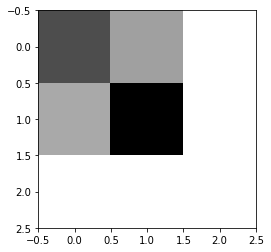

In [15]:
conf_matrix = metrics.confusion_matrix(y_predict, y_val)
print(conf_matrix)
plt.imshow(conf_matrix, cmap='binary');

In [16]:
# Predict.
predictions = model.predict(X_val)

# Print our model's predictions.
print(predictions)

# Check our predictions against the ground truths.
print(y_val) 

[1 1 0 ... 1 0 0]
[1 1 1 ... 0 1 0]


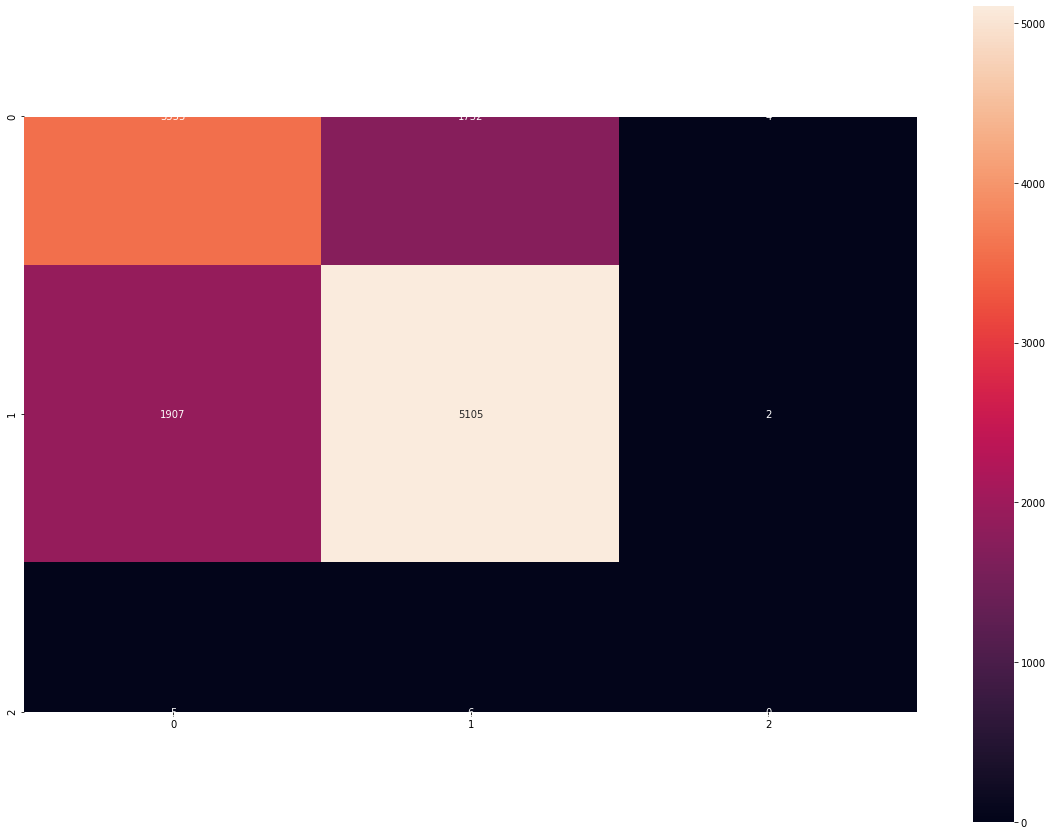

accuracy :70.3 %


In [17]:
y_train_class = y_val
y_pred_class = predictions
conf_mat = confusion_matrix(y_train_class, y_pred_class)
plt.figure(figsize=(15,10))
sns.heatmap(conf_mat,square=True, annot=True, fmt='.0f')
plt.show()
print("accuracy :" + str((accuracy_score(y_train_class, y_pred_class).round(3))*100)+" %")

In [18]:
print(accuracy_score(y_predict, y_val)*100, "%")

70.3150373497889 %


# Création d'un modèle type ensemble

In [19]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

C:\Users\utilisateur\Anaconda3\envs\computer_vision\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
y_predict = model.predict(X_val)

[[4007 1608    5]
 [1284 5406    6]
 [   0    0    0]]


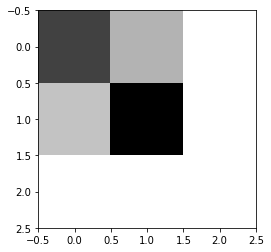

In [21]:
conf_matrix = metrics.confusion_matrix(y_predict, y_val)
print(conf_matrix)
plt.imshow(conf_matrix, cmap='binary');

In [22]:
print(accuracy_score(y_predict, y_val)*100, "%")

76.42903540110424 %


# Création d'un modèle type arbres de décision - méthode boosting

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)

In [ ]:
y_predict = model.predict(X_val)

In [ ]:
conf_matrix = metrics.confusion_matrix(y_predict, y_val)
print(conf_matrix)
plt.imshow(conf_matrix, cmap='binary');

In [ ]:
print(accuracy_score(y_predict, y_val)*100, "%")

# Conclusions

Performances obtenues :
- arbre de décision -> 70,3% 
- random forest -----> 76,42% 
- boosting ------------> 